In [102]:
import pandas as pd
import os
from pathlib import Path
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1 - Merging 12 Months of Sales Data to a single file

In [5]:
# get the list of all files and directories
# in the root directory
path = '/Users/brendan/Desktop/Python/Keith Galli/Sales_Data'
dir_list = os.listdir(path)
print(dir_list)


['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [58]:
all_months_data = pd.DataFrame()

for file in files:
    data = pd.read_csv(path+'/'+file)
    all_months_data = pd.concat([all_months_data, data])

all_months_data.tail()


        

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
13621,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


In [61]:
# save all dataframes to a csv
all_months_data.to_csv('all_months_data.csv', index=False)

# Read in updated DataFrame

In [76]:
all_data = pd.read_csv('all_months_data.csv')
print(type(all_data['Order Date']))
all_data.columns

<class 'pandas.core.series.Series'>


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

# data prep

In [91]:
# clean the data
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.shape
display(nan_df.head())

all_data = all_data.dropna(how='all')
nan_df.shape, all_data.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


((0, 7), (186305, 7))

In [93]:
# get rid of text in order date column
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

# add Month column to find the month
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

<ipython-input-93-02d152a0370e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]
<ipython-input-93-02d152a0370e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [95]:
## add a sales column
# revenue = Priuce * quantity
all_data['Sales'] = all_data['Quantity Ordered'].astype(int)*all_data['Price Each'].astype(float)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


# Question 1: what was the best month for sales? How much was earned that month?"

In [100]:
all_data.groupby(['Month']).sum().sort_values(by="Sales", ascending=False)



,Sales
Month,
12,4.613443e+06
10,3.736727e+06
4,3.390670e+06
11,3.199603e+06
5,3.152607e+06
3,2.807100e+06
7,2.647776e+06
6,2.577802e+06
8,2.244468e+06


## Plot the monthly sales totals

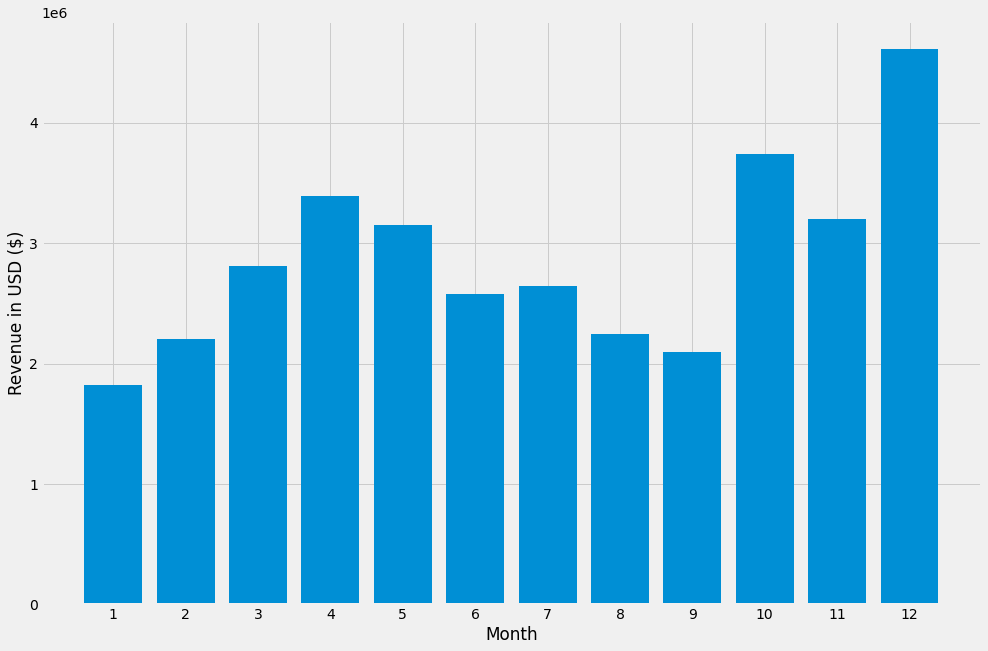

In [107]:
months= range(1,13)
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Revenue in USD ($)')
plt.xlabel('Month')
plt.show()

## What city sold the most?

In [112]:
## add city column
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)}")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA


In [117]:
all_data.groupby(['City']).sum().sort_values(by="Sales", ascending=False)



,Month,Sales
City,,
San Francisco (CA,315520,8.262204e+06
Los Angeles (CA,208325,5.452571e+06
New York City (NY,175741,4.664317e+06
Boston (MA,141112,3.661642e+06
Atlanta (GA,104794,2.795499e+06
Dallas (TX,104620,2.767975e+06
Seattle (WA,104941,2.747755e+06
Portland (OR,70621,1.870732e+06
Austin (TX,69829,1.819582e+06


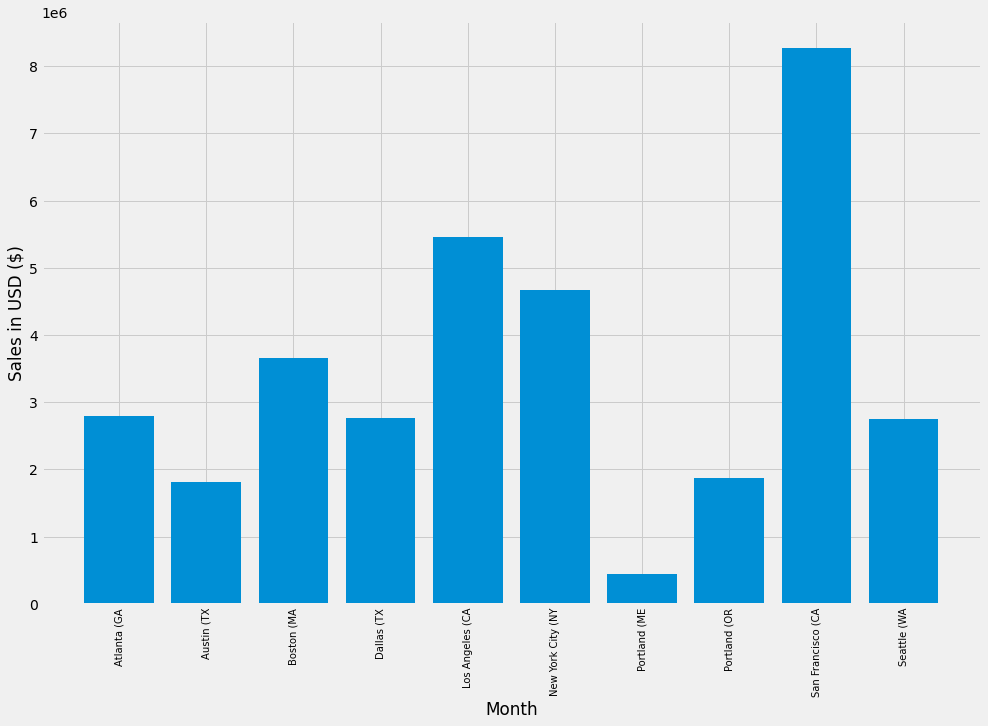

In [121]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.figure(figsize=(15,10))
plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.xticks(keys, rotation=90, size=10)
plt.show()

# When to display advertisements (at time of purchase) to maximize likelihood of purchase?

In [122]:

# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY,0,1,1
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA,12,38,1


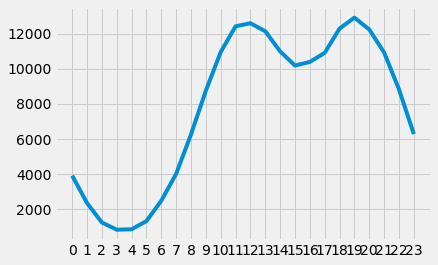

In [124]:

keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)

plt.show()

# What product sold the most??

In [128]:
all_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

<AxesSubplot:>

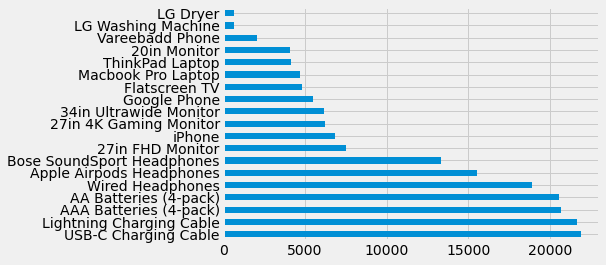

In [130]:
countProduct = pd.value_counts(all_data['Product'].values, sort=True)
countProduct.plot.barh()